# 인포그래픽

* toc : true
* branch: master
* badges: true
* comments: true
* author: 이강철
* categories: [R]
* published : true
* hide : false

## 매채별 버즈 점유율 

* 데이터 : 소셜미디어 트랜드 분석 $\to$ 버즈 분석 $\to$ 매체별 버즈 점유율

In [156]:
#collapse-hide
library(tidyverse)
setwd("D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/input")

data <- na.omit(read_csv("언어별 매체별 버즈점유율.csv"))
data <- data  %>% select(1,4)
names(data) <- c("매체","빈도")
total <- sum(data$빈도)
data$비율 <- round(data$빈도/total*100,1)
data <- data %>% arrange(desc(비율)) %>% filter(row_number()<=5)
write_excel_csv(data,"D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/output/매채별 버즈점유율.csv")

Rows: 9 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): Main Channel, buzz_count에 대한 총계 %
dbl (2): 최소값 레코드 수, buzz_count

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


![](버즈점유율참고.png)

## 주요관광지(상위 5개)

* 분석기간 : 2021.01 ~ 2021. 12

* 데이터 : 이동경로에 따른 소비 분석 $\to$ 내국인 핫스팟 지도

In [133]:
#collapse-hide
data <- read_csv("내국인 핫스팟 지도.csv") %>% 
                            select(1,4,5) %>% arrange(desc(유니크인구)) %>% filter(row_number()<=5)

data$`유니크인구에 대한 총계 %` <- round(as.double(gsub("%","",data$`유니크인구에 대한 총계 %`)),1)
names(data) <- c("관광지","비율","빈도")

Rows: 11 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): 핫스팟, 유니크인구에 대한 총계 %
dbl (3): Lat, Long, 유니크인구

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
"Ignoring unknown parameters: stat"


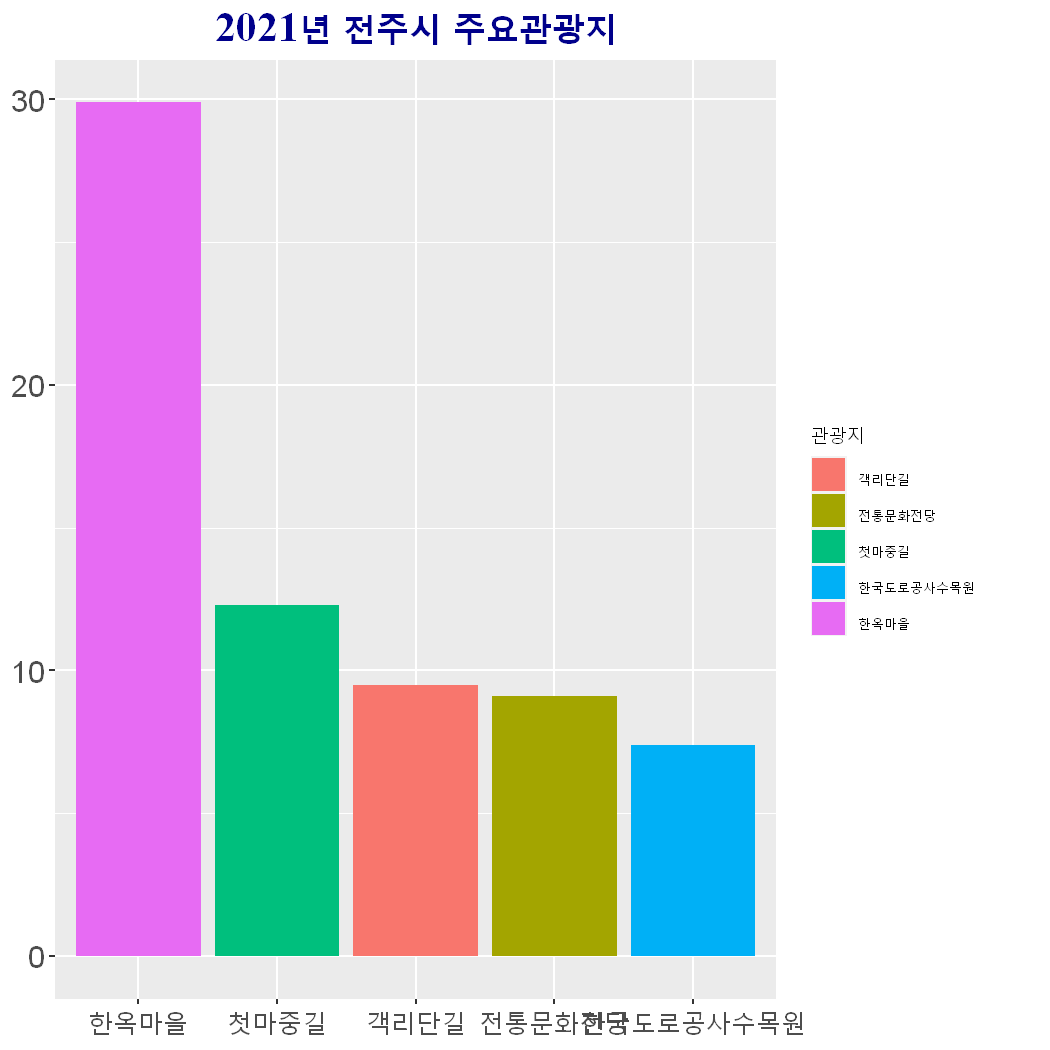

In [75]:
#collapse-hide
options(repr.plot.res=150)
data %>% ggplot(aes(x=reorder(관광지,desc(비율)), y= 비율,fill=관광지)) +
                geom_col(stat="identity") +
                labs(x=NULL,y=NULL) +
                ggtitle("2021년 전주시 주요관광지") +
                theme(plot.title = element_text(family = "serif", face = "bold", 
                                    hjust = 0.5, size = 20, color = "darkblue"),
               axis.text.x=element_text(size=15),
               axis.text.y=element_text(size=15),
               axis.title.x = element_text(size=18, hjust=0.5,color="darkblue",
                                      family = "serif",face = "bold")) 

write_excel_csv(data,"D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/output/주요관광지(상위5개).csv")

## 관광 주요활동

* 데이터 : 소셜 미디어 트렌드 분석$\to$ 버즈분석 $\to$ 관광지별 관광활동

In [123]:
# collapse-hide
data2 <- read_csv("관광지별 관광활동.csv")
names(data2) <- c("활동","관광지","비율","빈도")
data2$`활동` <- gsub("인문(문화/예술/역사)","인문",data2$`활동`)
g_data2 <- data2 %>% group_by(활동) %>% summarise(빈도 = sum(빈도)) %>% arrange(desc(빈도))
total <- sum(g_data2$`빈도`)
g_data2$비율 <- round(g_data2$`빈도`/total*100,1)
g_data2 <- g_data2 %>% select(1,3)

Rows: 120 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): Activity (group), Place Jj (group), count에 대한 총계 %
dbl (1): count

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
"Ignoring unknown parameters: stat"


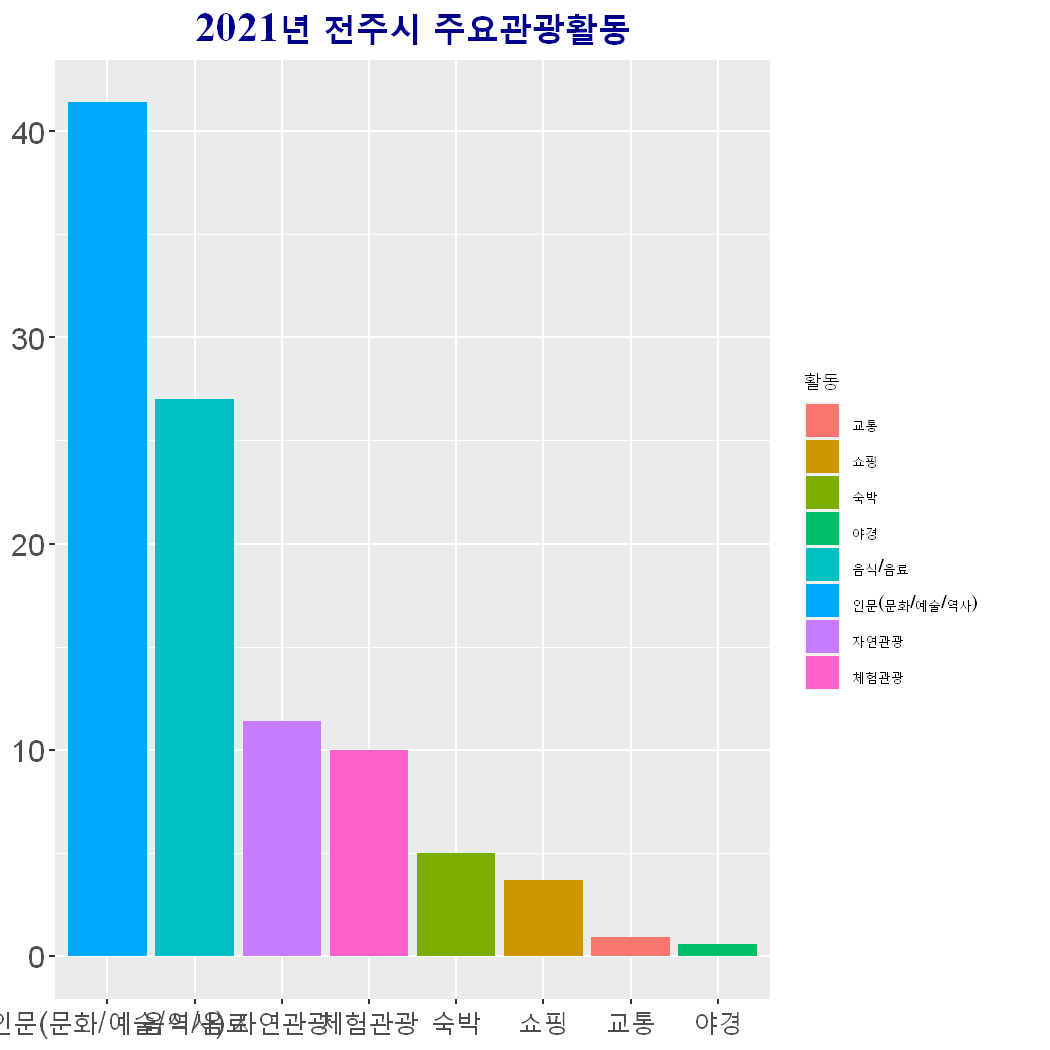

In [124]:
#collapse-hide
g_data2 %>% ggplot(aes(x=reorder(활동,desc(비율)), y= 비율,fill=활동)) +
                geom_col(stat="identity") +
                labs(x=NULL,y=NULL) +
                ggtitle("2021년 전주시 주요관광활동") +
                theme(plot.title = element_text(family = "serif", face = "bold", 
                                    hjust = 0.5, size = 20, color = "darkblue"),
               axis.text.x=element_text(size=15),
               axis.text.y=element_text(size=15),
               axis.title.x = element_text(size=18, hjust=0.5,color="darkblue",
                                      family = "serif",face = "bold")) 

write_excel_csv(g_data2,"D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/output/주요관광활동(상위5개).csv")

## 해시태그

* 데이터 : 소셜 미디어 트렌드 분석$\to$ 버즈분석 $\to$ 해시분석

In [126]:
# collapse-hide
data3 <- read_csv("해시 분석.csv")
data3 <- data3 %>% arrange(desc(Count))
t <- sum(data3$Count)
data3$비율 <- round(data3$Count/t*100,1)
data3 <- data3 %>% filter(row_number()<=10)
write_excel_csv(data3,"D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/output/해시태그 상위10개.csv")

Rows: 30 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Hash Data
dbl (1): Count

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


![]("해시태그참고.png")

## 전주 여행목적

* 데이터 : 소셜 미디어 트렌드 분석$\to$ 텍스트 분석 $\to$ 관광지별 관광활동

In [131]:
#collapse-hide
data4 <- read_csv("한국어_방문지선택이유.csv")
data4 <- data4 %>% filter(Sep1 =="여행목적") %>% arrange(desc(Count))
total <- sum(data4$Count)


data4$비율 <- data4$Count/total*100 
write_excel_csv(data4 %>% select(2,4,5) %>% filter(row_number()<=10),"D:/업무/전주시 관광데이터 포털(2022)/인포그래픽(2022)/output/여행목적.csv")

Rows: 74 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): Sep1, Sep2, Count에 대한 총계 %
dbl (1): Count

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


![](해시태그참고.png)


## 디자인 참고

[참고링크](https://nih.go.kr/gallery.es?mid=a20503020000&bid=0003&b_list=9&act=view&list_no=127111&nPage=93&vlist_no_npage=166&keyField=&keyWord=&orderby=)

In [2]:
!jupyter nbconvert --to html --template hidecode 인포그래픽(220704).ipynb

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: 예상하지 못한 기호(symbol)입니다.
1: !jupyter nbconvert
             ^
